In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [185]:
from sklearn.ensemble import (
    BaggingClassifier, 
    AdaBoostClassifier, 
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    StackingClassifier, 
    VotingClassifier
)
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [125]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Meteorological indexes:
nao
<br>
ao
<br>
aao
<br>
pna
<br>
enso
<br>
qbo


In [10]:
nao=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/nao%20index%20data.txt',header=None,names=['data'])
enso=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/enso%20index%20data.txt',header=None,names=['data'])
aao=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/aao%20index%20data.txt',header=None,names=['data'])
ao=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/ao%20index%20data.txt',header=None,names=['data'])
pna=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/pna%20index%20data.txt',header=None,names=['data'])
qbo=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/qbo%20index%20data.txt',header=None,names=['data'])

In [11]:
nao1=nao.data.str.split(expand=True,).set_index(0).iloc[29:72]
enso1=enso.data.str.split(expand=True,).set_index(0).iloc[29:72]
aao1=aao.data.str.split(expand=True,).set_index(0).iloc[1:44]
ao1=ao.data.str.split(expand=True,).set_index(0).iloc[29:72]
pna1=pna.data.str.split(expand=True,).set_index(0).iloc[29:72]
qbo1=qbo.data.str.split(expand=True,).set_index(0)


### Temperatures data at Milano Malpensa 1965-2021


In [12]:
t1=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/temperatures%20malpensa%201965-2021.txt',header=None,names=['data'])

In [13]:
temperatures =t1.data.str.split(expand=True,).set_index(0).iloc[14:58]
temperatures.columns=['data']

In [14]:
list_t=temperatures['data'].tolist()


In [15]:
list_t=list(map(float, list_t)) 

In [16]:
mean=statistics.mean(np.array(list_t))
mean

12.28139534883721

In [17]:
list_t_copy=list_t.copy()

In [18]:
#assigning -1 if below avg and 1 if above avg
for i in range(0,len(list_t_copy)):
    if list_t_copy[i] < mean:
        list_t_copy[i] = -1
    elif list_t_copy[i]== mean:
        list_t_copy[i] = 0
    elif list_t_copy[i] > mean:
        list_t_copy[i] = 1

Computing the annual mean for each index

In [19]:
nao1['mean'] = nao1.astype(float).mean(axis=1)
enso1['mean'] = enso1.astype(float).mean(axis=1)
aao1['mean'] = aao1.astype(float).mean(axis=1)
ao1['mean'] = ao1.astype(float).mean(axis=1)
pna1['mean'] = pna1.astype(float).mean(axis=1)



In [20]:
indexes=[nao1['mean'].tolist(),enso1['mean'].tolist(),aao1['mean'].tolist(),ao1['mean'].tolist(),\
         pna1['mean'].tolist()]

In [21]:
df=pd.DataFrame(indexes)
df1=df.transpose()

In [22]:
df1['average temperatures']=list_t

In [23]:
df1['temperature vs average'] = list_t_copy

In [24]:
df1.columns=['nao','enso','aao','ao','pna','average temperatures','temperature vs average']

In [25]:
X=np.array(indexes).T
y=list_t


## Precipitations

In [26]:
prp1=pd.read_csv('file:///Users/davidelibera/Library/Mobile%20Documents/com~apple~TextEdit/Documents/average%20prp.txt',header=None,names=['data'])

In [27]:
prp=prp1.iloc[14:57]
list_prp=prp['data'].tolist()



In [28]:
df1['average annual precipitations'] = list_prp

In [29]:
list_prp_copy=list_prp.copy()


In [30]:
list_prp_copy=list(map(float, list_prp_copy)) 
mean=statistics.mean(np.array(list_prp_copy))
mean

1154.6593023255814

### For precipitations:
<br>
if highly above avg: 2
<br>
if above avg: 1
<br>
if near avg: 0
<br>
if below avg: -1
<br>
if highly below avg -2

In [31]:
for i in range(0,len(list_prp_copy)):
    if list_prp_copy[i]-mean>300:
        list_prp_copy[i]=+2
    elif list_prp_copy[i]-mean>100:
        list_prp_copy[i]=+1
    elif list_prp_copy[i]-mean > -100 and list_prp_copy[i]-mean < 100:
        list_prp_copy[i]=0
    elif list_prp_copy[i]-mean< -300:
        list_prp_copy[i]= -2
    elif list_prp_copy[i]-mean< -100:
        list_prp_copy[i]=-1
         
    
    

In [32]:
df1['prp vs average'] = list_prp_copy


In [33]:
df1['year'] = range(1979,2022,1)

In [34]:
df_final=df1.set_index('year')

# Complete dataset

In [35]:
df_final.head()

,nao,enso,aao,ao,pna,average temperatures,temperature vs average,average annual precipitations,prp vs average
year,,,,,,,,,
1979,0.1350,0.250833,0.578250,-0.150333,0.194167,11.0,-1,1199.69,0
1980,-0.4125,0.253333,-0.962167,-0.365167,0.250000,10.6,-1,1268.45,1
1981,-0.2125,-0.268333,-0.440083,-0.643250,0.238333,11.1,-1,1206.54,0
1982,0.4300,0.990000,0.196167,-0.434583,-0.158333,12.1,-1,1031.72,-1
1983,0.3100,0.480000,0.066583,0.297667,0.807500,11.5,-1,842.03,-2


In [396]:
X1=np.array([nao1['mean'].tolist(),enso1['mean'].tolist(),ao1['mean'].tolist()]).T



In [36]:
len(df_final)

43

In [352]:
y=df_final['prp vs average'].values.tolist()
y1=df_final['temperature vs average'].values.tolist()

In [45]:
len(df_final)

43

In [443]:
avg_prp

['1199.69',
 '1268.45',
 '1206.54',
 '1031.72',
 '842.03',
 '1316.47',
 '1344.18',
 '1091.69',
 '1174.28',
 '1037.04',
 '884.43',
 '815.35',
 '2040.34',
 '1097.57',
 '1092.97',
 '988.87',
 '1293.66',
 '1215.69',
 '886.99',
 '445.28',
 '1094.77',
 '1523.16',
 '1543.16',
 '1503.16',
 '960.90',
 '614.45',
 '1563.16',
 '1483.16',
 '3137.94',
 '1471.43',
 '1047.53',
 '2218.21',
 '576.09',
 '983.98',
 '994.93',
 '1130.29',
 '639.85',
 '769.33',
 '503.16',
 '798.05',
 '1142.77',
 '889.73',
 '787.90']

In [445]:
avg_prp=df_final['average annual precipitations'].values.tolist()
prp_sorted=sorted(avg_prp,key=float)
prp_sorted

['445.28',
 '503.16',
 '576.09',
 '614.45',
 '639.85',
 '769.33',
 '787.90',
 '798.05',
 '815.35',
 '842.03',
 '884.43',
 '886.99',
 '889.73',
 '960.90',
 '983.98',
 '988.87',
 '994.93',
 '1031.72',
 '1037.04',
 '1047.53',
 '1091.69',
 '1092.97',
 '1094.77',
 '1097.57',
 '1130.29',
 '1142.77',
 '1174.28',
 '1199.69',
 '1206.54',
 '1215.69',
 '1268.45',
 '1293.66',
 '1316.47',
 '1344.18',
 '1471.43',
 '1483.16',
 '1503.16',
 '1523.16',
 '1543.16',
 '1563.16',
 '2040.34',
 '2218.21',
 '3137.94']

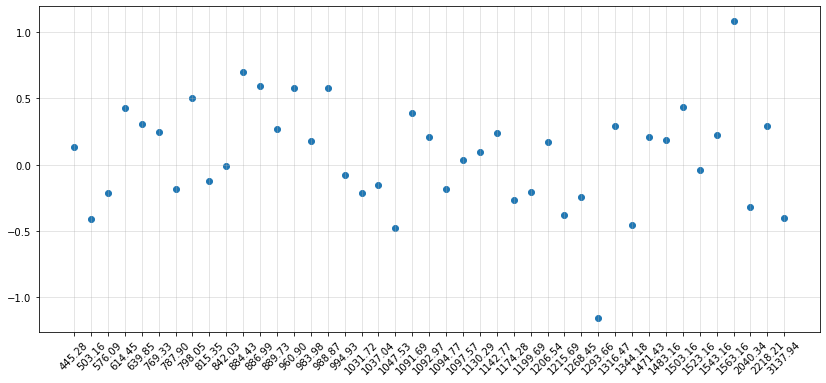

In [446]:
plt.figure(figsize=(14,6))
plt.scatter(prp_sorted,df_final['nao'])
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
ax.set_facecolor('#f4f1ee')
plt.show()

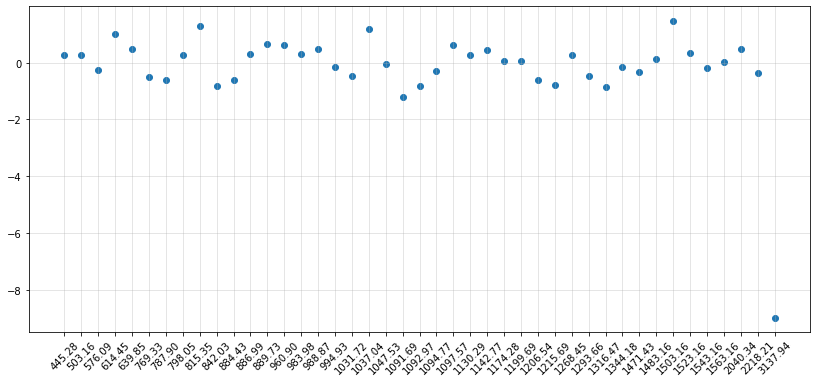

In [447]:
plt.figure(figsize=(14,6))
plt.scatter(prp_sorted,df_final['enso'])
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
ax.set_facecolor('#f4f1ee')
plt.show()

# Classification 
## Precipitations 

In [399]:
precision=[]
recall=[]
for model in tqdm(models):
    y_pred=cross_val_predict(model,X, y, cv=4)
    scores=cross_val_score(model, X, y, scoring='accuracy', cv=4, n_jobs=-1)
    print(color.BOLD+model.__class__.__name__+color.END,'Accuracy:',"{:.0%}".format(scores.astype(float).mean()))
    #print(y_pred,model
    labels=[-2,-1,0,1,2]
    y_true=y
    y_pred=y_pred
    #cm=confusion_matrix(y_true, y_pred,labels=labels)
    #disp=ConfusionMatrixDisplay(cm,display_labels=labels)
    #disp.plot(cmap=plt.cm.Reds)
    #plt.show()
    recall.append(recall_score(y_true, y_pred, average=None))
    precision.append(precision_score(y_true, y_pred, average=None))
    print('Recall:',"{:.0%}".format(statistics.mean(recall_score(y_true, y_pred, average=None))))
    print('Precision:',"{:.0%}".format(statistics.mean(precision_score(y_true, y_pred, average=None))))
    
print(color.RED+'Questi modelli predittivi fanno mooooolto schifo'+color.END)



    

  0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression Accuracy: 21%
Recall: 18%
Precision: 17%
SVC Accuracy: 26%
Recall: 23%
Precision: 21%
GaussianNB Accuracy: 21%
Recall: 18%
Precision: 18%
DecisionTreeClassifier Accuracy: 7%
Recall: 6%
Precision: 5%
Questi modelli predittivi fanno mooooolto schifo


In [175]:
precision=[]
recall=[]
for model in models:
    skf = StratifiedKFold(n_splits=2)
    y_pred=cross_val_predict(model,X, y, cv=skf)
    scores=cross_val_score(model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
    print(color.BOLD+model.__class__.__name__+color.END,'Accuracy:',"{:.0%}".format(scores.astype(float).mean()))
    #print(y_pred,model)
    labels=[-2,-1,0,1,2]
    y_true=y
    y_pred=y_pred
    #cm=confusion_matrix(y_true, y_pred,labels=labels)
    #disp=ConfusionMatrixDisplay(cm,display_labels=labels)
    #disp.plot(cmap=plt.cm.Reds)
    #plt.show()
    recall.append(recall_score(y_true, y_pred, average=None,zero_division=1))
    precision.append(precision_score(y_true, y_pred, average=None,zero_division=1))
    print('Recall:',"{:.0%}".format(statistics.mean(recall_score(y_true, y_pred, average=None))))
    print('Precision:',"{:.0%}".format(statistics.mean(precision_score(y_true, y_pred, average=None))))
          
print(color.RED+'Questi modelli predittivi fanno mooooolto schifo, ma un po meno di prima grazie allo stratified K-fold'+color.END)
          

LogisticRegression Accuracy: 28%
Recall: 24%
Precision: 23%
SVC Accuracy: 19%
Recall: 16%
Precision: 13%
GaussianNB Accuracy: 28%
Recall: 24%
Precision: 22%
DecisionTreeClassifier Accuracy: 19%
Recall: 16%
Precision: 19%
Questi modelli predittivi fanno mooooolto schifo, ma un po meno di prima grazie allo stratified K-fold


/Users/davidelibera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidelibera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [328]:
classifier_svm=svm.SVC(kernel='linear')
lr = LogisticRegression()
nbc=GaussianNB()
clf = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
models=[lr,classifier_svm,nbc,clf]


In [314]:
models2=[lr,clf]

In [239]:
n_est=[1,2,3,4,5,6,7,8,9,10]
for n_estimators in n_est:
    bagging_clf = BaggingClassifier(base_estimator=lr, n_estimators=n_estimators, max_samples=0.4, 
                                    max_features=0.5, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, 
                                     X,y, cv=skf)
    print(n_estimators,"{:.0%}".format(bagging_scores.mean()))

1 23%
2 19%
3 21%
4 21%
5 21%
6 19%
7 21%
8 25%
9 21%
10 25%


In [237]:
max_s=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
for max_samples in max_s:
    bagging_clf = BaggingClassifier(base_estimator=lr, n_estimators=8, max_samples=max_samples, 
                                    max_features=0.5, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, 
                                     X,y, cv=skf)
    print(max_samples,"{:.0%}".format(bagging_scores.mean()))

0.1 26%
0.2 25%
0.4 25%
0.5 30%
0.7 23%
0.8 26%
0.9 25%


In [241]:
max_f=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
for max_features in max_f:
    bagging_clf = BaggingClassifier(base_estimator=lr, n_estimators=8, max_samples=0.5, 
                                    max_features=max_features, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, 
                                     X,y, cv=skf)
    print(max_features,"{:.0%}".format(bagging_scores.mean()))

0.1 30%
0.2 30%
0.4 30%
0.5 30%
0.7 30%
0.8 30%
0.9 30%


In [371]:
n_est=[1,2,3,4,5,6,7,8,9,10]
bagging_scores=[]

for n_estimators in tqdm(n_est):
    max_s=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
    for max_samples in max_s:
        max_f=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
        for max_features in max_f:
            bagging_clf = BaggingClassifier(base_estimator=lr, n_estimators=n_estimators, max_samples=max_samples, 
                                    max_features=max_features, random_state=429)
            bagging_scores.append(cross_val_score(bagging_clf,X,y, cv=skf))
            y_pred=cross_val_predict(bagging_clf,X, y, cv=skf)
            y_true=y
            y_pred=y_pred
print("{:.0%}".format(max(np.stack(bagging_scores, axis=0).mean(axis=1))))
print(color.BLUE+'Col bagging si inizia a ragionare'+color.END)




            #print(n_estimators,max_samples,max_features,"{:.0%}".format(bagging_scores.mean()))

  0%|          | 0/10 [00:00<?, ?it/s]

35%
Col bagging si inizia a ragionare


In [325]:
n_est=[1,2,3,4,5,6,7,8,9,10]
bagging_scores=[]

for n_estimators in tqdm(n_est):
    max_s=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
    for max_samples in max_s:
        max_f=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
        for max_features in max_f:
            bagging_clf = BaggingClassifier(base_estimator=clf, n_estimators=n_estimators, max_samples=max_samples, 
                                    max_features=max_features, random_state=429)
            bagging_scores.append(cross_val_score(bagging_clf,X,y, cv=skf))

print("{:.0%}".format(max(np.stack(bagging_scores, axis=0).mean(axis=1))))
print(color.GREEN+'Si ragiona ancora di più'+color.END)


  0%|          | 0/10 [00:00<?, ?it/s]

46%
Si ragiona ancora di più


### Random forest


In [336]:
n_est=[10,20,30,50,70,100,150,200]
for n_estimators in tqdm(n_est):
    rf=RandomForestClassifier(n_estimators=n_estimators)
    y_pred=cross_val_predict(rf,X, y, cv=skf)
    scores=cross_val_score(rf, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
    print("{:.0%}".format(scores.mean()))
print(color.YELLOW+'così così random forest'+color.END)


  0%|          | 0/8 [00:00<?, ?it/s]

21%
23%
19%
26%
26%
26%
23%
23%
così così random forest


## Boosting

### Ada boost

In [355]:
n_est=[10,20,30,50,70,100,150,200]
for n_estimators in tqdm(n_est):
    ada = AdaBoostClassifier(n_estimators=n_estimators,
                         random_state=0, 
                         algorithm='SAMME',
                         base_estimator =lr )
    ada_scores = cross_val_score(ada, X,y, cv=skf)
    print("{:.0%}".format(ada_scores.mean()))

  0%|          | 0/8 [00:00<?, ?it/s]

30%
23%
26%
32%
30%
26%
26%
26%


### Gradient boosting

In [356]:
n_est=[10,20,30,50,70,100,150,200]
for n_estimators in tqdm(n_est):
    gb = GradientBoostingClassifier(n_estimators=n_estimators)
    gb_scores = cross_val_score(lr, X, y,cv=skf)
    print("{:.0%}".format(gb_scores.mean()))

  0%|          | 0/8 [00:00<?, ?it/s]

28%
28%
28%
28%
28%
28%
28%
28%


## Temperatures

### Basic classifiers

In [406]:
precision=[]
recall=[]
for model in tqdm(models):
    skf = StratifiedKFold(n_splits=2)
    y_pred=cross_val_predict(model,X1, y1, cv=skf)
    scores=cross_val_score(model, X1, y1, scoring='accuracy', cv=skf, n_jobs=-1)
    print(color.BOLD+model.__class__.__name__+color.END,'Accuracy:',"{:.0%}".format(scores.astype(float).mean()))
    #print(y_pred,model)
    labels=[-2,-1,0,1,2]
    y_true=y1
    y_pred=y_pred
    #cm=confusion_matrix(y_true, y_pred,labels=labels)
    #disp=ConfusionMatrixDisplay(cm,display_labels=labels)
    #disp.plot(cmap=plt.cm.Reds)
    #plt.show()
    recall.append(recall_score(y_true, y_pred, average=None,zero_division=1))
    precision.append(precision_score(y_true, y_pred, average=None,zero_division=1))
    print('Recall:',"{:.0%}".format(statistics.mean(recall_score(y_true, y_pred, average=None))))
    print('Precision:',"{:.0%}".format(statistics.mean(precision_score(y_true, y_pred, average=None))))
          
print(color.RED+'In questo caso un po meglio, ma non accettabile'+color.END)

  0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression Accuracy: 54%
Recall: 52%
Precision: 53%
SVC Accuracy: 52%
Recall: 51%
Precision: 51%
GaussianNB Accuracy: 58%
Recall: 58%
Precision: 58%
DecisionTreeClassifier Accuracy: 56%
Recall: 57%
Precision: 57%
In questo caso un po meglio, ma non accettabile


### Ensemble methods- Bagging

In [372]:
n_est=[1,2,3,4,5,6,7,8,9,10]
bagging_scores=[]

for n_estimators in tqdm(n_est):
    max_s=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
    for max_samples in max_s:
        max_f=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
        for max_features in max_f:
            bagging_clf = BaggingClassifier(base_estimator=lr,n_estimators=n_estimators, max_samples=max_samples, 
                                    max_features=max_features, random_state=429)
            bagging_scores.append(cross_val_score(bagging_clf,X,y1, cv=skf))

print("{:.0%}".format(max(np.stack(bagging_scores, axis=0).mean(axis=1))))
print(color.GREEN+'BUOOOONO'+color.END)

  0%|          | 0/10 [00:00<?, ?it/s]

65%
BUOOOONO


In [405]:
n_est=[1,2,3,4,5,6,7,8,9,10]
bagging_scores=[]

for n_estimators in tqdm(n_est):
    max_s=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
    for max_samples in max_s:
        max_f=[0.1,0.2,0.4,0.5,0.7,0.8,0.9]
        for max_features in max_f:
            bagging_clf = BaggingClassifier(base_estimator=clf,n_estimators=n_estimators, max_samples=max_samples, 
                                    max_features=max_features, random_state=429)
            bagging_scores.append(cross_val_score(bagging_clf,X,y1, cv=skf))

print("{:.0%}".format(max(np.stack(bagging_scores, axis=0).mean(axis=1))))
print(color.GREEN+'BUOOOONO'+color.END)

  0%|          | 0/10 [00:00<?, ?it/s]

77%
BUOOOONO


### Random forest

In [402]:
n_est=[10,20,30,50,70,100,150,200]
for n_estimators in tqdm(n_est):
    rf=RandomForestClassifier(n_estimators=n_estimators)
    y_pred=cross_val_predict(rf,X1, y1, cv=skf)
    scores=cross_val_score(rf, X1, y1, scoring='accuracy', cv=skf, n_jobs=-1)
    print("{:.0%}".format(scores.mean()))
print(color.YELLOW+'così così random forest, ma sempre meglio di prima'+color.END)

  0%|          | 0/8 [00:00<?, ?it/s]

63%
58%
60%
63%
58%
67%
63%
60%
così così random forest, ma sempre meglio di prima


## Ada boost

In [409]:
n_est=[10,20,30,50,70,100,150,200]
for n_estimators in tqdm(n_est):
    ada = AdaBoostClassifier(n_estimators=n_estimators,
                         random_state=0, 
                         algorithm='SAMME',
                         base_estimator =lr )
    ada_scores = cross_val_score(ada, X,y1, cv=skf)
    print("{:.0%}".format(ada_scores.mean()))

  0%|          | 0/8 [00:00<?, ?it/s]

51%
51%
51%
51%
51%
51%
51%
51%


### Gradient boosting

In [408]:
n_est=[10,20,30,50,70,100,150,200]
for n_estimators in tqdm(n_est):
    gb = GradientBoostingClassifier(n_estimators=n_estimators)
    gb_scores = cross_val_score(lr, X, y1,cv=skf)
    print("{:.0%}".format(gb_scores.mean()))

  0%|          | 0/8 [00:00<?, ?it/s]

58%
58%
58%
58%
58%
58%
58%
58%


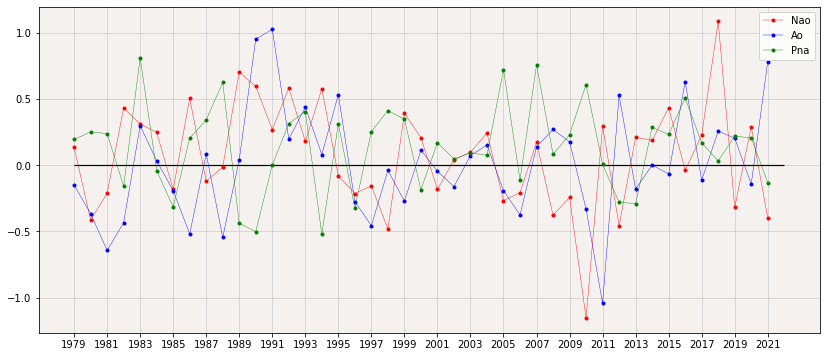

In [350]:
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(df_final['nao'], marker='.', linestyle='-', linewidth = 0.4, label='Nao', color='red')
ax.plot(df_final['ao'],marker='.', linestyle='-', linewidth = 0.4, label='Ao', color='blue')
ax.plot(df_final['pna'],marker='.', linestyle='-', linewidth = 0.4, label='Pna', color='green')
plt.xticks(ticks=range(1979,2022,2))
plt.hlines(y=0, xmin=1979, xmax=2022,color='black',linewidth=1.2)
plt.grid(alpha=0.5)
plt.legend()
ax.set_facecolor('#f4f1ee')
plt.show()